In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")

In [33]:
# Load Dataset
file_path = "D:\\VOIS\\Airbnb_Open_Data_Set.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Read first sheet (adjust if needed)
df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])

# Strip column spaces
df.columns = df.columns.str.strip()

# Drop duplicates
df = df.drop_duplicates()

# Preview
df.head()

Available sheets: ['in']


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [34]:
# Convert numeric columns
numeric_cols = ['price','service fee','review rate number','availability 365',
                'Construction year','calculated host listings count']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing numeric values
df = df.dropna(subset=numeric_cols)

# Quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100391 entries, 0 to 102044
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              100391 non-null  int64         
 1   NAME                            100155 non-null  object        
 2   host id                         100391 non-null  int64         
 3   host_identity_verified          100145 non-null  object        
 4   host name                       100005 non-null  object        
 5   neighbourhood group             100380 non-null  object        
 6   neighbourhood                   100377 non-null  object        
 7   lat                             100384 non-null  float64       
 8   long                            100384 non-null  float64       
 9   country                         99878 non-null   object        
 10  country code                    100297 non-null  object      

Property Types:
 room type
Entire home/apt    52587
Private room       45528
Shared room         2163
Hotel room           113
Name: count, dtype: int64


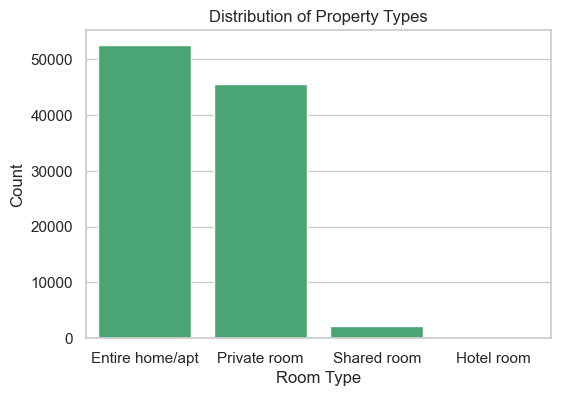

In [35]:
# Different Property Types

property_types = df['room type'].value_counts()
print("Property Types:\n", property_types)

plt.figure(figsize=(6,4))
sns.barplot(x=property_types.index, y=property_types.values, color="mediumseagreen")
plt.title("Distribution of Property Types")
plt.ylabel("Count")
plt.xlabel("Room Type")
plt.show()

In [36]:
# Count listings per neighborhood group
neigh_group_counts = df['neighbourhood group'].value_counts()

# Convert to DataFrame and rename columns
neigh_df = neigh_group_counts.reset_index()
neigh_df.columns = ['neighbourhood group', 'count']  # first column = neighborhood, second = count

# Optional: clean typo
neigh_df['neighbourhood group'] = neigh_df['neighbourhood group'].replace({'brookln':'Brooklyn'})

# Plot
px.bar(neigh_df, x='neighbourhood group', y='count', 
       title="Listings per Neighborhood Group",
       labels={'neighbourhood group':'Neighborhood Group','count':'Count'}).show()

In [37]:
# Neighborhood group with highest avg prices

avg_price_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print("\nAverage Price per Neighborhood Group:\n", avg_price_group)

px.bar(avg_price_group.reset_index(), x='neighbourhood group', y='price',
       title="Average Prices by Neighborhood Group", labels={'price':'Average Price'}).show()



Average Price per Neighborhood Group:
 neighbourhood group
Bronx            630.786445
Queens           630.000462
Brooklyn         626.204102
Staten Island    623.274866
Manhattan        622.899326
brookln          580.000000
Name: price, dtype: float64



Correlation between Construction Year and Price: -0.0037


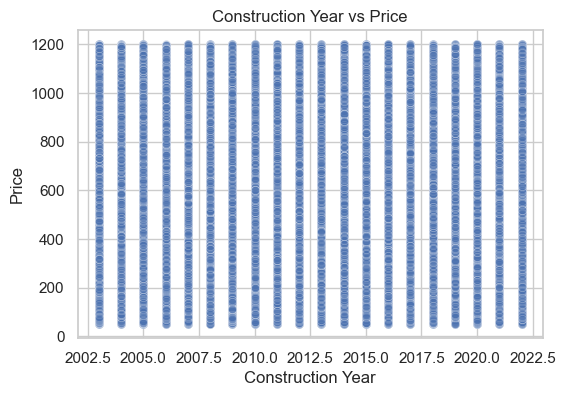

In [38]:
# Relationship between Construction Year & Price

corr_year_price = df[['Construction year','price']].corr().iloc[0,1]
print(f"\nCorrelation between Construction Year and Price: {corr_year_price:.4f}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Construction year", y="price", alpha=0.3)
plt.title("Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()

In [39]:
# Top 10 Hosts by Listing Count

top_hosts = df.groupby(['host id','host name'])['calculated host listings count'].max().nlargest(10)
print("\nTop 10 Hosts:\n", top_hosts)

px.bar(top_hosts.reset_index(), x='host name', y='calculated host listings count',
       title="Top 10 Hosts by Listing Count", labels={'calculated host listings count':'Listing Count','host name':'Host Name'}).show()



Top 10 Hosts:
 host id      host name 
695353567    Blueground    332.0
1727019127   Blueground    332.0
3190103639   Blueground    332.0
3231719861   Blueground    332.0
3405726007   Blueground    332.0
6866703084   Blueground    332.0
8674093918   Blueground    332.0
10572530839  Blueground    332.0
18344435096  Blueground    332.0
20052088242  Blueground    332.0
Name: calculated host listings count, dtype: float64



Average Ratings by Host Verification:
 host_identity_verified
unconfirmed    3.271706
verified       3.286240
Name: review rate number, dtype: float64


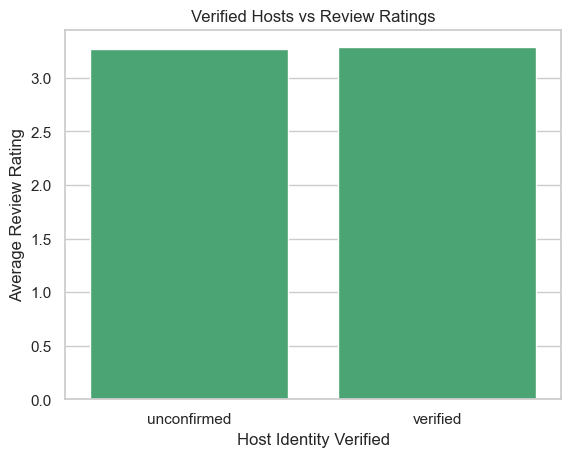

In [40]:
# Verified hosts vs reviews

verified_reviews = df.groupby('host_identity_verified')['review rate number'].mean()
print("\nAverage Ratings by Host Verification:\n", verified_reviews)

sns.barplot(x=verified_reviews.index, y=verified_reviews.values, color="mediumseagreen")
plt.title("Verified Hosts vs Review Ratings")
plt.xlabel("Host Identity Verified")
plt.ylabel("Average Review Rating")
plt.show()


Correlation between Price and Service Fee: 0.99999


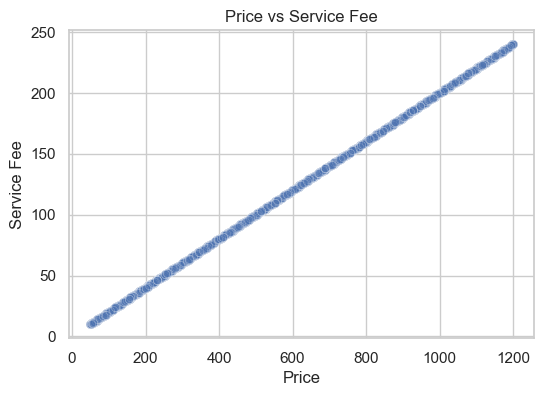

In [41]:
# Price vs Service Fee Correlation

corr_price_service = df[['price','service fee']].corr().iloc[0,1]
print(f"\nCorrelation between Price and Service Fee: {corr_price_service:.5f}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="price", y="service fee", alpha=0.3)
plt.title("Price vs Service Fee")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.show()

In [42]:
# Avg Review Rate by Neighborhood & Room Type

avg_review_rate = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().reset_index()
print("\nAverage Review Rate:\n", avg_review_rate.head())

px.bar(avg_review_rate, x="neighbourhood group", y="review rate number", color="room type",
       barmode="group", title="Average Review Ratings by Neighborhood & Room Type",
       labels={'review rate number':'Average Review Rating','neighbourhood group':'Neighborhood Group'}).show()


Average Review Rate:
   neighbourhood group        room type  review rate number
0               Bronx  Entire home/apt            3.356356
1               Bronx     Private room            3.320471
2               Bronx      Shared room            3.238938
3            Brooklyn  Entire home/apt            3.252270
4            Brooklyn       Hotel room            3.857143



Correlation between Host Listings Count and Availability: 0.1600


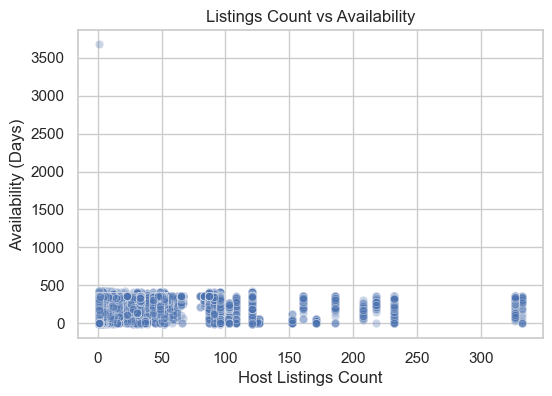

In [43]:
# Availability vs Host Listing Count

corr_availability = df[['calculated host listings count','availability 365']].corr().iloc[0,1]
print(f"\nCorrelation between Host Listings Count and Availability: {corr_availability:.4f}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="calculated host listings count", y="availability 365", alpha=0.3)
plt.title("Listings Count vs Availability")
plt.xlabel("Host Listings Count")
plt.ylabel("Availability (Days)")
plt.show()